<a href="https://colab.research.google.com/github/phsoaressantos/machineLearning_supervisionado/blob/main/Projeto_ML_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pós Graduação em Engenharia de Dados: Big Data**

#**Projeto conclusão curso: Modelos Supervisionados**

**Autor: Paulo Henrique Soares dos Santos**




---

Execute as atividades pedidas abaixo. Todos os itens devem ser resolvidos utilizando a linguagem Python e as bibliotecas apropriadas. Os códigos completos para solução deverão ser incluídos no PDF da entrega:


In [114]:
#1 - Carregue os dados do arquivo “Ames_Housing.zip” para dataframes de treino e teste, usando o módulo Pandas. Maiores informações sobre esta base podem ser encontradas em: Package ‘AmesHousing’.

#montando drive para pegar arquivos diretamente do google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
#verificando conteudo do dataset
!ls "/content/drive/MyDrive/ML_SUPERVISIONADOS"

Churn_Modelling.csv  housing_teste.csv	housing_treino.csv  mtcars.csv


In [116]:
#1- importando biblioteca pandas e importando os dados de HOUSING_TESTE para dentro do dataframe.
import pandas as pd

df_teste = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/housing_teste.csv', sep=',')
df_teste.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
1,Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2010,WD,Normal,195500,-93.638925,42.060779
2,Two_Story_1946_and_Newer,Residential_Low_Density,60,7500,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2010,WD,Normal,189000,-93.639068,42.059193
3,Two_Story_1946_and_Newer,Residential_Low_Density,63,8402,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,5,2010,WD,Normal,180400,-93.638647,42.058151
4,Two_Story_1946_and_Newer,Residential_Low_Density,47,53504,Pave,No_Alley_Access,Moderately_Irregular,HLS,AllPub,CulDSac,...,No_Fence,None,0,6,2010,WD,Normal,538000,-93.626550,42.061239


In [117]:
#verificando os tipos das variaveis
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         1172 non-null   object 
 1   MS_Zoning           1172 non-null   object 
 2   Lot_Frontage        1172 non-null   int64  
 3   Lot_Area            1172 non-null   int64  
 4   Street              1172 non-null   object 
 5   Alley               1172 non-null   object 
 6   Lot_Shape           1172 non-null   object 
 7   Land_Contour        1172 non-null   object 
 8   Utilities           1172 non-null   object 
 9   Lot_Config          1172 non-null   object 
 10  Land_Slope          1172 non-null   object 
 11  Neighborhood        1172 non-null   object 
 12  Condition_1         1172 non-null   object 
 13  Condition_2         1172 non-null   object 
 14  Bldg_Type           1172 non-null   object 
 15  House_Style         1172 non-null   object 
 16  Overal

In [118]:
#importando biblioteca pandas e importando os dados de HOUSING_TREINO para dentro do dataframe.
import pandas as pd

df_treino = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/housing_treino.csv', sep=',')
df_treino.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,52,6240,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,8,2006,WD,Family,149000,-93.621484,42.031436
1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,8335,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2006,WD,Normal,93000,-93.662736,42.024752
2,Two_Story_1946_and_Newer,Residential_Low_Density,65,15426,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,8,2009,WD,Normal,231500,-93.688372,42.021207
3,Two_Story_1946_and_Newer,Residential_Low_Density,60,21930,Pave,No_Alley_Access,Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,7,2006,WD,Normal,192140,-93.644580,42.060239
4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,9503,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Good_Wood,None,0,6,2007,WD,Normal,144000,-93.624758,42.044758


In [119]:
# Avaliando base de treino
df_treino.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.00000,...,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,57.887941,10213.904437,1971.325939,1984.269056,104.366894,4.181456,52.156428,553.654721,1054.014221,1163.31058,...,24.310011,2.709898,15.042662,2.408419,58.501706,6.158134,2007.833902,181081.128555,-93.642774,42.034413
std,33.555439,8940.110414,30.346924,20.787618,181.168192,2.229455,175.733490,441.701952,459.933645,400.74190,...,66.614548,26.281152,52.498724,37.778439,678.461463,2.710258,1.315703,82023.898282,0.025725,0.018603
min,0.000000,1470.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-93.693153,41.986509
25%,43.000000,7311.500000,1953.000000,1965.000000,0.000000,3.000000,0.000000,212.250000,782.000000,874.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000,-93.660096,42.022475
50%,63.000000,9360.000000,1973.000000,1993.000000,0.000000,3.000000,0.000000,459.500000,990.000000,1092.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,-93.641508,42.034682
75%,79.000000,11494.750000,2001.000000,2003.000000,168.000000,7.000000,0.000000,791.750000,1306.000000,1403.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000,-93.622316,42.049588
max,313.000000,215245.000000,2010.000000,2010.000000,1378.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.00000,...,1012.000000,508.000000,396.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,-93.577427,42.063388


In [120]:
# 2- Usando o dataframe criado o item 1, execute um modelo de regressão linear que relacione a variável dependente “Sale_Price” com as variáveis independentes “Gr_Liv_Area”, “Lot_Area”, “Bedroom_AbvGr”, “Lot_Frontage” e “Garage_Area”. Apresente o código completo de treinamento do modelo e de aplicação do modelo treinado no conjunto de testes.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecionando as variáveis independentes e a variável dependente
X_train = df_treino[['Gr_Liv_Area', 'Lot_Area', 'Bedroom_AbvGr', 'Lot_Frontage', 'Garage_Area']]
y_train = df_treino['Sale_Price']
X_test = df_teste[['Gr_Liv_Area', 'Lot_Area', 'Bedroom_AbvGr', 'Lot_Frontage', 'Garage_Area']]
y_test = df_teste['Sale_Price']

# Criando uma instância do modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: {:.2f}".format(rmse))


RMSE: 43821.33


In [121]:
# 3- A partir da aplicação do modelo treinado no conjunto de teste, apresente a métrica MAE encontrada.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Selecionar as variáveis independentes e a variável dependente
X_train = df_treino[['Gr_Liv_Area', 'Lot_Area', 'Bedroom_AbvGr', 'Lot_Frontage', 'Garage_Area']]
y_train = df_treino['Sale_Price']
X_test = df_teste[['Gr_Liv_Area', 'Lot_Area', 'Bedroom_AbvGr', 'Lot_Frontage', 'Garage_Area']]
y_test = df_teste['Sale_Price']

# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))


MAE: 30465.29


In [122]:
# 4- A partir da aplicação do modelo treinado no conjunto de teste, apresente a métrica MAPE encontrada

import numpy as np

y_true = y_test.values
y_pred = model.predict(X_test)

mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("MAPE: {:.2f}%".format(mape))

#Isso indica que o modelo tem uma margem média de erro de 18.74% na estimativa dos preços de venda.


MAPE: 18.74%


In [123]:
# 5- Carregue os dados do arquivo “MtCars_Dataset.zip” para um dataframe, usando o módulo Pandas. Maiores detalhes sobre a base podem ser encontrados no PDF que está no mesmo arquivo ZIP.
# carregando para uma base de treino o dataset
df_treino_mtcars = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/mtcars.csv', sep=',')
df_treino_mtcars.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [124]:
# tipos de variaveis, verificando:
df_treino_mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [125]:
# Conhecendo um pouco mais do DF
# OBS: Arredondei todos os valores para 2 casas decimais para facilitar entendimento

df_treino_mtcars.describe().round(2)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,20.09,6.19,230.72,146.69,3.60,3.22,17.85,0.44,0.41,3.69,2.81
std,6.03,1.79,123.94,68.56,0.53,0.98,1.79,0.50,0.50,0.74,1.62
min,10.40,4.00,71.10,52.00,2.76,1.51,14.50,0.00,0.00,3.00,1.00
25%,15.42,4.00,120.82,96.50,3.08,2.58,16.89,0.00,0.00,3.00,2.00
50%,19.20,6.00,196.30,123.00,3.70,3.32,17.71,0.00,0.00,4.00,2.00
75%,22.80,8.00,326.00,180.00,3.92,3.61,18.90,1.00,1.00,4.00,4.00
max,33.90,8.00,472.00,335.00,4.93,5.42,22.90,1.00,1.00,5.00,8.00


##6- Considerando que está diante de um problema de classificação você utilizaria uma abordagem Treino-Teste para treinamento e validação do problema? Justifique.

Resposta:

Não, no caso da base de dados "mtcars", não faz sentido utilizar uma abordagem de treino-teste para um problema de classificação, pois a variável de resposta ("mpg") é uma variável contínua que representa o consumo de combustível em milhas por galão.

Uma abordagem de treino-teste é comumente usada em problemas de
classificação quando a variável de resposta é categórica, ou seja, quando estamos tentando prever uma classe ou categoria específica. No entanto, no caso do conjunto de dados "mtcars", a variável de resposta é contínua e, portanto, é mais adequado utilizar técnicas de regressão para modelar e prever o consumo de combustível.

Nesse contexto, podemos utilizar técnicas de regressão, como regressão linear, regressão logistica ou outros modelos de regressão para treinar e validar o modelo usando medidas de desempenho adequadas para problemas de regressão, como o erro médio quadrático (RMSE) ou o coeficiente de determinação (R²).

In [126]:
#7- A partir dos dados importados, execute um modelo de regressão logística que relacione a variável dependente 'VS' (motor com configuração em V (0) ou Straight , em linha (1)) com as variáveis independentes “mpg”, “cyl”, “disp”, “hp” e “wt”. Apresente o código completo de treinamento do modelo.

from sklearn.linear_model import LogisticRegression

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df_treino_mtcars[['mpg', 'cyl', 'disp', 'hp', 'wt']]
y = df_treino_mtcars['vs']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando uma instância do modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados
model.fit(X, y)


LogisticRegression()

In [127]:
#8- Apresente as métricas acurácia e o F1-Score de seu modelo final.

from sklearn.model_selection import train_test_split

# Calculando a acurácia do modelo no conjunto de teste
accuracy = model.score(X_test, y_test)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o F1-Score
f1 = f1_score(y_test, y_pred)

# Imprimindo a acurácia e o F1-Score
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")

print("F1-Score:", f1)
f1_percentual = round(f1 * 100,2)
print(f"F1-Score em percentual:{f1_percentual}%")

Acurácia: 0.9
Acurácia em percentual: 90.0%
F1-Score: 0.888888888888889
F1-Score em percentual:88.89%


In [128]:
#9- A partir dos dados importados na questão 5, execute agora um modelo de árvore de decisão relacionando as mesmas variáveis. Apresente o código completo de treinamento do modelo.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Definir as variáveis independentes (X) e a variável dependente (y)
X = df_treino_mtcars[['mpg', 'cyl', 'disp', 'hp', 'wt']]
y = df_treino_mtcars['vs']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar uma instância do modelo de Árvore de Decisão
model = DecisionTreeClassifier()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [129]:
#10- Apresente a acurácia de seu modelo final, agora utilizando a árvore de decisão.

from sklearn.metrics import accuracy_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Imprimir a acurácia
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")


Acurácia: 1.0
Acurácia em percentual: 100.0%


In [130]:
#11- Apresente o F1-Score de seu modelo final, para cada uma das classes-alvo, agora utilizando a árvore de decisão

from sklearn.metrics import f1_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o F1-Score para cada classe-alvo
f1score = f1_score(y_test, y_pred, average=None)

# Apresentar o F1-Score para cada classe-alvo
for i, score in enumerate(f1score):
    print("F1-Score Classe", i, ":", score)


F1-Score Classe 0 : 1.0
F1-Score Classe 1 : 1.0


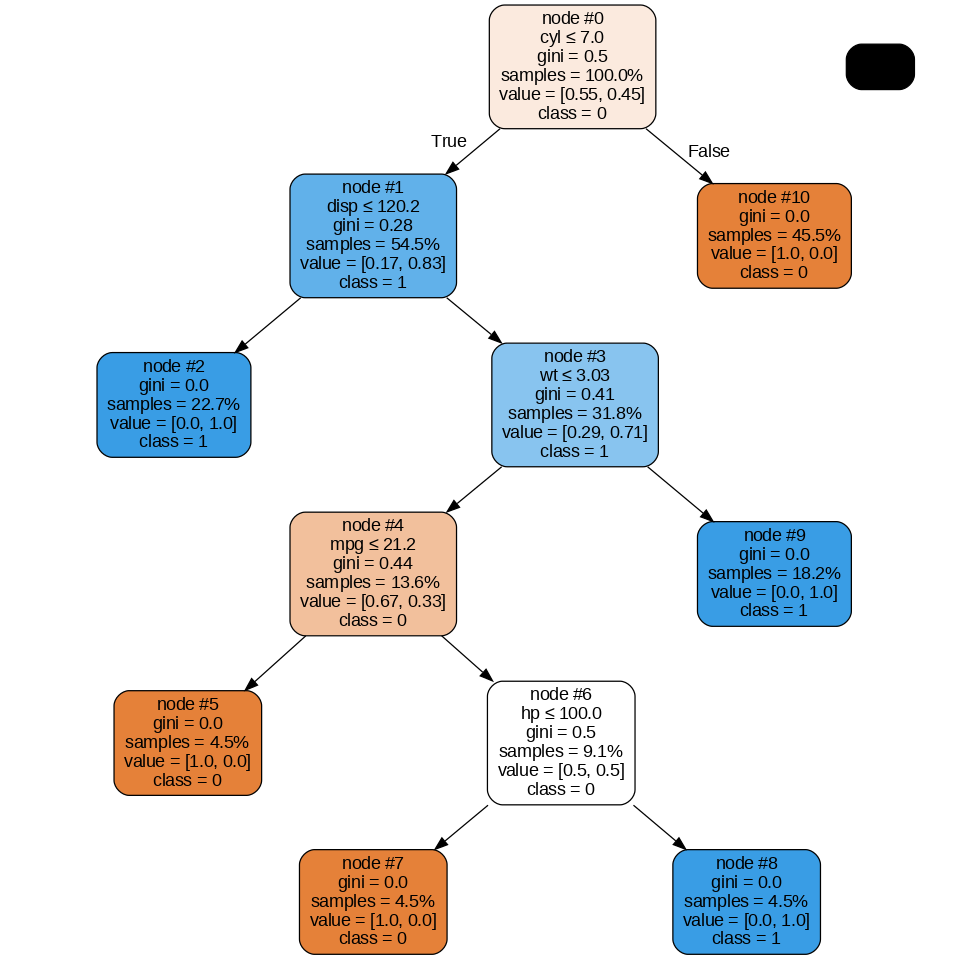

In [131]:
# Visualizando a Arvore
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Visualizando a arvore
dot_data = export_graphviz(
    model,
    feature_names=X.columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True,  # Adiciona caracteres especiais
    node_ids=True,  # Mostra os IDs dos nós
    proportion=True,  # Mostra proporções nas caixas
    precision=2,  # Define a precisão dos valores exibidos
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,10!"')  # Define o tamanho do gráfico
graph.set_ratio("fill")  # Preenche todo o espaço disponível
Image(graph.create_png())


##12- Qual dos dois modelos aplicados na base performaram melhor em relação às duas métricas pedida?
Resposta:

Arvore de decisao pois o F1-Score de 1.0 para ambas as classes indica um desempenho perfeito do modelo na classificação dessas classes específicas. Isso significa que o modelo é altamente preciso e capaz de identificar corretamente todos os exemplos das classes 0 e 1.


In [132]:
#13- Carregue os dados do arquivo “Churn Modelling_Dataset.zip” para um dataframe, usando o módulo Pandas. A descrição das variáveis pode ser encontrada no arquivo TXT que está no mesmo arquivo ZIP.

df_churn = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/Churn_Modelling.csv', sep=',')
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##14 - A partir dos dados importados, execute um modelo de redes neurais que relacione a variável dependente 'Exited' com todas as demais as variáveis independentes do conjunto de dados. Faça uma separação 80-20 para conjuntos de treino e teste escolha uma função de ativação apropriada para o problema proposto e execute experimentos para encontrar a arquitetura da rede neural que entregue o melhor resultado para a acurácia pedida abaixo. Apresente o código completo de treinamento do modelo e de aplicação do modelo treinado no conjunto de testes.


In [133]:
# Resposta questao 14, testando diferentes possibilidades de redes neurais.

#utilizando activation = relu

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Codificar as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Verificar se existem valores NaN no dataframe
if df_churn.isna().any().any():
    print("O dataframe contém valores NaN. Por favor, faça o tratamento adequado.")

# Dividir os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")


Acurácia: 0.4645
Acurácia em percentual: 46.45%


In [134]:
#utilizando activation = logistic

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Codificar as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Dividir os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', random_state=42)


# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")

Acurácia: 0.8035
Acurácia em percentual: 80.35%


In [135]:
#utilizando activation = logistic e aumentando base de teste para (70-30), somente para comparacao. Problema pede para usar  80/20

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Codificar as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Verificar se existem valores NaN no dataframe
if df_churn.isna().any().any():
    print("O dataframe contém valores NaN. Por favor, faça o tratamento adequado.")

# Dividir os dados em conjuntos de treino e teste (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', random_state=42)


# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")

Acurácia: 0.8053333333333333
Acurácia em percentual: 80.53%


In [136]:
# utilizando activation = identify

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Separando as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Verificando se existem valores NaN no dataframe
if df_churn.isna().any().any():
    print("O dataframe contém valores NaN. Por favor, faça o tratamento adequado.")

# Codificando as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Dividindo os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='identity', random_state=42)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")



Acurácia: 0.508
Acurácia em percentual: 50.8%


In [137]:
# utilizando activation = tanh com 80/20

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Carregando os dados do dataframe só para garantir que nao houve manipulacao nos testes anteriores
df_churn = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/Churn_Modelling.csv', sep=',')

# Verificando se existem valores NaN no dataframe
if df_churn.isna().any().any():
    print("O dataframe contém valores NaN. Por favor, faça o tratamento adequado.")

# Separarando as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Codificando as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Normalizando as variáveis
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', random_state=42)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo final
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")

Acurácia: 0.8485
Acurácia em percentual: 84.85%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
# utilizando activation = tanh e aumentando numero de neuronios nas camadas ocultas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Carregando os dados do dataframe só para garantir que nao houve manipulacao nos testes anteriores
df_churn = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/Churn_Modelling.csv', sep=',')

# Verificando se existem valores NaN no dataframe
if df_churn.isna().any().any():
    print("O dataframe contém valores NaN. Por favor, faça o tratamento adequado.")

# Separarando as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Codificando as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Normalizando as variáveis
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(300, 200,100), activation='tanh', learning_rate_init=0.10, random_state=42)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo final
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")


Acurácia: 0.8135
Acurácia em percentual: 81.35%


##15- Justifique a escolha da função de ativação.
Resposta:

A escolha da função de ativação "tanh" (tangente hiperbólica) neste trabalho é justificada por ela possuir um comportamento sigmoidal em forma de "S" e pode mapear valores de entrada em uma faixa mais ampla, de -1 a 1. Essa capacidade de representação flexível pode ser especialmente útil quando as relações entre as variáveis não são lineares, semelhante ao que encontramos no problema. Obtive a melhor acurácia com ela (84.85%).  

Contudo, visto todo este cenário a escolha da função de ativação 'tanh' pode ser justificada como a mais adequada para este modelo


## 16- Apresente a acurácia de seu modelo final.


In [139]:
#Acurácia do modelo final, utilizando activation = tanh
#No contexto do modelo de redes neurais, a função de ativação 'tanh' se refere à função tangente hiperbólica. A função de ativação 'tanh' mapeia os valores de entrada para o intervalo entre -1 e 1.
#Com essa mudança, o código normaliza os dados antes de dividir os dados em conjuntos de treino e teste, e usa os mesmos valores de média e desvio padrão para normalizar os dados de treino e teste.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Carregando os dados do dataframe só para garantir que nao houve manipulacao nos testes anteriores
df_churn = pd.read_csv('/content/drive/MyDrive/ML_SUPERVISIONADOS/Churn_Modelling.csv', sep=',')

# Verificando se existem valores NaN no dataframe
if df_churn.isna().any().any():
    print("O dataframe contém valores NaN. Por favor, faça o tratamento adequado.")

# Separarando as variáveis independentes (X) e a variável dependente (y)
X = df_churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df_churn['Exited']

# Codificando as variáveis categóricas para valores numéricos
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

# Normalizando as variáveis
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma instância do modelo de redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', random_state=42)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo final
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
acuracia_percentual = round(accuracy * 100, 2)
print(f"Acurácia em percentual: {acuracia_percentual}%")

Acurácia: 0.8485
Acurácia em percentual: 84.85%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


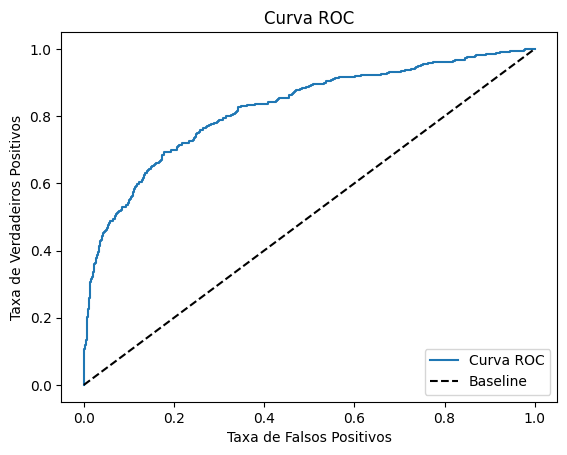

In [140]:
# Calculando e exibindo a curva ROC para complementar a análise

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Calcular as probabilidades das classes
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()